In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib as mpl
sb.set() # set the default Seaborn style for graphics

from numpy.random import RandomState
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import datetime as dt
%matplotlib inline
import nltk
from nltk.probability import FreqDist


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR


In [2]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,4/1/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,4/1/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,4/1/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,4/1/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,4/1/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
R = RandomState(seed=1)
train = listings.sample(frac=0.8, random_state=R)
test = listings.loc[~listings.index.isin(train.index)]

In [4]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [5]:
train.shape


(3054, 92)

In [6]:
train.head(2)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3994601,https://www.airbnb.com/rooms/3994601,2.020000e+13,4/1/2016,Crayola Home Green Room-Bunk Bed 5,Our space is a mix of a hostel and a home. We ...,Our listing offers a unique Airbnb experience ...,Our space is a mix of a hostel and a home. We ...,none,The Capitol Hill neighborhood has a great mix ...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,18,1.24
1,723846,https://www.airbnb.com/rooms/723846,2.020000e+13,4/1/2016,Seattle Cozy Cottage in Maple Leaf,Beautiful little cottage built in 2012 featuri...,We have a beautiful new little cozy studio gue...,Beautiful little cottage built in 2012 featuri...,none,People who live in the Maple Leaf neighborhood...,...,10.0,f,NaN,WASHINGTON,f,strict,f,t,1,1.21


In [7]:
test.shape

(764, 92)

In [8]:
test.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,5680462,https://www.airbnb.com/rooms/5680462,2.020000e+13,4/1/2016,Stunning 6 bd in THE BEST Location!,"Stunning Designsponge featured 6 bed, 3.75 bat...","Gorgeous, LIGHT FILLED, Newly Constructed Mode...","Stunning Designsponge featured 6 bed, 3.75 bat...",none,Queen Anne is THE BEST and most desirable neig...,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,1,2.65
1,8988178,https://www.airbnb.com/rooms/8988178,2.020000e+13,4/1/2016,"Lovely Queen Anne Cottage, 2 BR","This home is full of light, art and comfort. 5...","The Space This is a 1000 square foot, two bedr...","This home is full of light, art and comfort. 5...",none,Queen Anne is a charming and very safe neighbo...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.73


# Data cleaning

In [9]:
print(sorted(train.columns))

['accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review', 'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'id', 'instant_bookable', 'is_location_exact', 'jurisdiction_names', 'last_review', 'last_scraped', 'latitude', 'license', 'listing_url', 'longitude', 'market', 'maximum_nights', 'medium_url', 'minimum_nights', 'monthly_price', 

In [418]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['host_is_superhost'] = data['host_is_superhost'].fillna('f')
data['host_listings_count'] = data['host_listings_count'].fillna(0)
data['host_total_listings_count'] = data['host_total_listings_count'].fillna(0)
data['bathrooms'] = data['bathrooms'].fillna(0)
data['bedrooms'] = data['bedrooms'].fillna(0)
data['beds'] = data['beds'].fillna(0)
data['review_scores_rating'] = data['review_scores_rating'].fillna(0)
data['review_scores_accuracy'] = data['review_scores_accuracy'].fillna(0)
data['review_scores_cleanliness'] = data['review_scores_cleanliness'].fillna(0)
data['review_scores_checkin'] = data['review_scores_checkin'].fillna(0)
data['review_scores_communication'] = data['review_scores_communication'].fillna(0)
data['review_scores_location'] = data['review_scores_location'].fillna(0)
data['review_scores_value'] = data['review_scores_value'].fillna(0)
data['price'] = data['price'].fillna(0)
data['weekly_price'] = data['weekly_price'].fillna(0)
data['monthly_price'] = data['monthly_price'].fillna(0)
data['security_deposit'] = data['security_deposit'].fillna(0)
data['cleaning_fee'] = data['cleaning_fee'].fillna(0)
data['extra_people'] = data['extra_people'].fillna(0)
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['weekly_price'] = data['weekly_price'].str.replace('$', '')
data['weekly_price'] = data['weekly_price'].str.replace(',', '')
data['monthly_price'] = data['monthly_price'].str.replace('$', '')
data['monthly_price'] = data['monthly_price'].str.replace(',', '')
data['security_deposit'] = data['security_deposit'].str.replace('$', '')
data['security_deposit'] = data['security_deposit'].str.replace(',', '')
data['cleaning_fee'] = data['cleaning_fee'].str.replace('$', '')
data['cleaning_fee'] = data['cleaning_fee'].str.replace(',', '')
data['extra_people'] = data['extra_people'].str.replace('$', '')
data['extra_people'] = data['extra_people'].str.replace(',', '')
data['price'] = data['price'].astype(float)
data['weekly_price'] = data['weekly_price'].astype(float)
data['monthly_price'] = data['monthly_price'].astype(float)
data['security_deposit'] = data['security_deposit'].astype(float)
data['cleaning_fee'] = data['cleaning_fee'].astype(float)
data['extra_people'] = data['extra_people'].astype(float)
data['amenities'] = data['amenities'].str.replace('{','')
data['amenities'] = data['amenities'].str.replace('}','')
data['amenities'] = data['amenities'].str.replace('"','')
data['amenities'] = data['amenities'].str.replace('""','')

In [938]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null float64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      34

In [10]:
# Drop set of unwanted features

In [11]:
keep_features = [
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'host_id',
        'host_since',
        'host_is_superhost', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'latitude',
        'longitude', 'is_location_exact', 'property_type', 'room_type',
        'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'amenities', 'security_deposit', 'cleaning_fee',
        'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
        'minimum_minimum_nights', 'maximum_minimum_nights',
        'minimum_maximum_nights', 'maximum_maximum_nights',
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
        'has_availability', 'availability_30', 'availability_60',
        'availability_90', 'availability_365', 'calendar_last_scraped',
        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
        'require_guest_profile_picture', 'require_guest_phone_verification',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'number_of_reviews','price'
    ]


drop_features = [i for i in listings.columns if i not in keep_features]

t1 = train.copy()
t1.drop(drop_features, axis=1, inplace=True)
train=t1.copy()

t2 = test.copy()
t2.drop(drop_features, axis=1, inplace=True)
test = t2.copy()


t3 = listings.copy()
t3.drop(drop_features, axis=1, inplace=True)
listings = t3.copy()

In [12]:
listings.shape

(3818, 44)

In [13]:
train.shape

(3054, 44)

In [14]:
test.shape

(764, 44)

In [15]:
def discard_old_listings(df,drop_listings):
        
    more_than_12months=sorted(df[df['calendar_updated'].str.contains(
    'months ago')]['calendar_updated'].unique())
    
    more_than_12months=[i for i in more_than_12months if int(i[:-10])>12]
    
    if(drop_listings==False):  #Give the reader an idea of listings to be dropped
        #print('All listing periods=',df['calendar_updated'].unique(),'\n')
        print('Listing periods of at least a year old=',more_than_12months)
    
    if drop_listings==True:
        
        for i in more_than_12months:
            
            j=df[df['calendar_updated'].str.contains(i)].index
            
            df.drop(df.index[j],inplace=True)
            df.reset_index(drop=True,inplace=True)
        
        df.drop('calendar_updated', axis=1, inplace=True)
        
    return df

In [16]:
listings = discard_old_listings(listings,False)
listings.shape

Listing periods of at least a year old= ['13 months ago', '14 months ago', '15 months ago', '16 months ago', '17 months ago', '22 months ago', '30 months ago']


(3818, 44)

In [17]:
listings = discard_old_listings(listings,True)
listings.shape

(3809, 43)

In [18]:
listings.head()

,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,956883,11/8/2011,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,...,41,71,346,4/1/2016,207,f,moderate,f,f,2
1,5177328,21/2/2013,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,...,13,16,291,4/1/2016,43,f,strict,t,t,6
2,16708587,12/6/2014,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,West Queen Anne,Queen Anne,...,6,17,220,4/1/2016,20,f,strict,f,f,2
3,9851441,6/11/2013,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,West Queen Anne,Queen Anne,...,0,0,143,4/1/2016,0,f,flexible,f,f,1
4,1452570,29/11/2011,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,...,60,90,365,4/1/2016,38,f,strict,f,f,1


In [19]:
train=discard_old_listings(train,True)
train.shape

(3047, 43)

In [20]:
test=discard_old_listings(test,True)
test.shape

(762, 43)

In [21]:
def clean_data(df):
    
    for i in ['price','cleaning_fee','security_deposit', 'extra_people']:
        df[i]=df[i].str.replace('$','').str.replace(',', '').astype(float)
    
    df['amenities']=df['amenities'].str.replace('{}','').str.replace('{ }','')
    
    df['amenities']=df['amenities'].str.replace(
    '$','').str.replace('{','').str.replace('}','').str.replace(
    '"','').str.replace(' toilet','toilet').str.replace('Cable TV','TV')

    df.replace('', np.nan, inplace=True)
    
    return df

In [22]:
listings=clean_data(listings)
train=clean_data(train)
test=clean_data(test)

In [23]:
listings.shape, train.shape, test.shape

((3809, 43), (3047, 43), (762, 43))

In [24]:
listings[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"TV,TV,Internet,Wireless Internet,Air Condition...",85.0,NaN,NaN,5.0
1,"TV,Internet,Wireless Internet,Kitchen,Free Par...",150.0,40.0,100.0,0.0
2,"TV,TV,Internet,Wireless Internet,Air Condition...",975.0,300.0,1000.0,25.0
3,"Internet,Wireless Internet,Kitchen,Indoor Fire...",100.0,NaN,NaN,0.0
4,"TV,TV,Internet,Wireless Internet,Kitchen,Heati...",450.0,125.0,700.0,15.0
...,...,...,...,...,...
3804,"TV,TV,Internet,Wireless Internet,Air Condition...",359.0,230.0,NaN,0.0
3805,"TV,TV,Internet,Wireless Internet,Kitchen,Free ...",79.0,50.0,500.0,25.0
3806,"TV,Wireless Internet,Kitchen,Free Parking on P...",93.0,35.0,250.0,20.0
3807,"TV,Wireless Internet,Kitchen,Free Parking on P...",99.0,45.0,300.0,0.0


In [25]:
train[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"Wireless Internet,Kitchen,Free Parking on Prem...",27.0,NaN,NaN,0.0
1,"TV,Internet,Wireless Internet,Kitchen,Free Par...",79.0,65.0,300.0,5.0
2,"TV,TV,Internet,Wireless Internet,Air Condition...",63.0,50.0,100.0,0.0
3,"Wireless Internet,Free Parking on Premises,Hea...",99.0,15.0,100.0,0.0
4,"TV,Wireless Internet,Buzzer/Wireless Intercom,...",87.0,10.0,100.0,20.0
...,...,...,...,...,...
3042,"TV,Internet,Wireless Internet,Kitchen,Free Par...",85.0,50.0,NaN,20.0
3043,"TV,TV,Internet,Wireless Internet,Pool,Kitchen,...",250.0,120.0,250.0,25.0
3044,"TV,Wireless Internet,Kitchen,Free Parking on P...",75.0,40.0,NaN,0.0
3045,"TV,Internet,Wireless Internet,Kitchen,Free Par...",119.0,NaN,NaN,0.0


In [26]:
test[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"TV,TV,Internet,Wireless Internet,Kitchen,Free ...",461.0,300.0,1500.0,50.0
1,"TV,TV,Internet,Kitchen,Free Parking on Premise...",109.0,89.0,NaN,0.0
2,"TV,TV,Internet,Wireless Internet,Kitchen,Free ...",200.0,NaN,NaN,0.0
3,"Internet,Wireless Internet,Kitchen,Free Parkin...",110.0,NaN,NaN,0.0
4,"TV,TV,Wireless Internet,Air Conditioning,Wheel...",450.0,200.0,500.0,50.0
...,...,...,...,...,...
757,"TV,Internet,Wireless Internet,Kitchen,Heating,...",115.0,60.0,199.0,12.0
758,"TV,TV,Internet,Wireless Internet,Free Parking ...",85.0,40.0,100.0,0.0
759,"TV,TV,Internet,Wireless Internet,Air Condition...",109.0,55.0,200.0,30.0
760,"TV,Internet,Wireless Internet,Kitchen,Free Par...",77.0,15.0,NaN,15.0


In [27]:
def quick_check_missing_data(df,data):
    print('features with missing data in {}'.format(data))
    print('________________________________________________')
    
    for i in df.columns.values:
        x=df.loc[df[i].isnull()][i]
        if len(x)>0:print(i,len(x))
    print('________________________________________________')
    print()

In [28]:
quick_check_missing_data(listings,'training data set')

features with missing data in training data set
________________________________________________
host_since 2
host_is_superhost 2
host_listings_count 2
host_total_listings_count 2
host_has_profile_pic 2
host_identity_verified 2
zipcode 7
property_type 1
bathrooms 16
bedrooms 6
beds 1
amenities 45
security_deposit 1947
cleaning_fee 1026
________________________________________________



In [29]:
quick_check_missing_data(train,'training data set')

features with missing data in training data set
________________________________________________
host_since 2
host_is_superhost 2
host_listings_count 2
host_total_listings_count 2
host_has_profile_pic 2
host_identity_verified 2
zipcode 6
property_type 1
bathrooms 13
bedrooms 4
beds 1
amenities 34
security_deposit 1558
cleaning_fee 825
________________________________________________



In [30]:
quick_check_missing_data(test, 'test data set')

features with missing data in test data set
________________________________________________
zipcode 1
bathrooms 3
bedrooms 2
amenities 11
security_deposit 389
cleaning_fee 201
________________________________________________



In [31]:
def feature_identification(df):
    categorical_features = df.columns[df.dtypes == 'object']
    numerical_features = df.columns[df.dtypes != 'object']
    
    i=len(categorical_features)
    j=len(numerical_features)
    
    print('There are {} categorical features and {} numerical features'.format(i,j),'\n')
    print('categorical features={}'.format(sorted(categorical_features)),'\n')
    print('numerical features={}'.format(sorted(numerical_features)),'\n')
    
    return (categorical_features,numerical_features)

categorical_features,numerical_features=feature_identification(train)

There are 21 categorical features and 22 numerical features 

categorical features=['amenities', 'bed_type', 'calendar_last_scraped', 'cancellation_policy', 'city', 'has_availability', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_since', 'host_verifications', 'instant_bookable', 'is_location_exact', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'require_guest_phone_verification', 'require_guest_profile_picture', 'room_type', 'state', 'zipcode'] 

numerical features=['accommodates', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people', 'guests_included', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit'] 



In [32]:
def check_var(i,numerical_features):
    if i in numerical_features: 
        return('numerical')
    else:
        return('categorical')
    
def check_missing_data(df,numerical_features):
    df2 = df.isnull().sum()
    df2.sort_values(axis=0,ascending=False,inplace=True)
    number_of_rows=len(df)
    missing_types=[check_var(i,numerical_features) for i in df2.index]
    headers=[tuple(df[i].head(n=5)) for i in df2.index]
    tmp1 = pd.DataFrame({'Feature':df2.index, 
                         'Missing values':df2.values})
    tmp1['Feature type']=pd.Series(missing_types, index=tmp1.index)
    tmp1['Percentage missing']=pd.Series(df2.values*100/number_of_rows, index=tmp1.index)
    tmp1['First 5 values']=pd.Series(headers, index=tmp1.index)
    return tmp1

In [33]:
tmp=check_missing_data(listings,numerical_features)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,1947,numerical,51.115778,"(nan, 100.0, 1000.0, nan, 700.0)"
1,cleaning_fee,1026,numerical,26.936204,"(nan, 40.0, 300.0, nan, 125.0)"
2,amenities,45,categorical,1.181412,"(TV,TV,Internet,Wireless Internet,Air Conditio..."
3,bathrooms,16,numerical,0.420058,"(1.0, 1.0, 4.5, 1.0, 2.0)"
4,zipcode,7,categorical,0.183775,"(98119, 98119, 98119, 98119, 98119)"
5,bedrooms,6,numerical,0.157522,"(1.0, 1.0, 5.0, 0.0, 3.0)"
6,host_since,2,categorical,0.052507,"(11/8/2011, 21/2/2013, 12/6/2014, 6/11/2013, 2..."
7,host_is_superhost,2,categorical,0.052507,"(f, t, f, f, f)"
8,host_listings_count,2,numerical,0.052507,"(3.0, 6.0, 2.0, 1.0, 2.0)"
9,host_total_listings_count,2,numerical,0.052507,"(3.0, 6.0, 2.0, 1.0, 2.0)"


In [34]:
tmp=check_missing_data(train,numerical_features)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,1558,numerical,51.132261,"(nan, 300.0, 100.0, 100.0, 100.0)"
1,cleaning_fee,825,numerical,27.075812,"(nan, 65.0, 50.0, 15.0, 10.0)"
2,amenities,34,categorical,1.115852,"(Wireless Internet,Kitchen,Free Parking on Pre..."
3,bathrooms,13,numerical,0.426649,"(3.5, 1.0, 1.0, 1.0, 1.0)"
4,zipcode,6,categorical,0.196915,"(98112, 98115, 98117, 98119, 98104)"
5,bedrooms,4,numerical,0.131277,"(1.0, 0.0, 1.0, 1.0, 1.0)"
6,host_since,2,categorical,0.065638,"(8/7/2013, 2/10/2012, 20/8/2014, 31/12/2014, 1..."
7,host_is_superhost,2,categorical,0.065638,"(f, f, t, t, f)"
8,host_listings_count,2,numerical,0.065638,"(18.0, 1.0, 3.0, 1.0, 1.0)"
9,host_total_listings_count,2,numerical,0.065638,"(18.0, 1.0, 3.0, 1.0, 1.0)"


In [35]:
tmp=check_missing_data(test,numerical_features)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,389,numerical,51.049869,"(1500.0, nan, nan, nan, 500.0)"
1,cleaning_fee,201,numerical,26.377953,"(300.0, 89.0, nan, nan, 200.0)"
2,amenities,11,categorical,1.443570,"(TV,TV,Internet,Wireless Internet,Kitchen,Free..."
3,bathrooms,3,numerical,0.393701,"(3.5, 1.0, 2.0, 1.0, 2.5)"
4,bedrooms,2,numerical,0.262467,"(6.0, 2.0, 1.0, 1.0, 3.0)"
5,zipcode,1,categorical,0.131234,"(98119, 98119, 98119, 98119, 98119)"


In [36]:
def drop_features_and_impute_values(df):
    df['security_deposit'].fillna(0.0,inplace=True)
    df['cleaning_fee'].fillna(0.0,inplace=True)
    df.dropna(subset=['zipcode','amenities',
                      'cancellation_policy',
                      'host_verifications'],inplace=True)
    df.drop('city', axis=1, inplace=True) 
    df.drop('host_since',axis=1,inplace=True)
    
    ftodrop=['beds','bathrooms','bedrooms',
              'host_is_superhost','host_listings_count',
              'host_total_listings_count','host_has_profile_pic',
              'host_identity_verified','state', 'property_type']
    
    for i in ftodrop:
        df[i].fillna(df[i].mode()[0], inplace=True)
        
    df.reset_index(drop=True,inplace=True)

In [37]:
drop_features_and_impute_values(listings)

In [38]:
drop_features_and_impute_values(train)

In [39]:
drop_features_and_impute_values(test)

In [40]:
def check_cleaningness(df):
    print(df.shape)
    print(df.isnull().values.any())

In [41]:
check_cleaningness(listings)
check_missing_data(listings,numerical_features).head()

(3757, 41)
False


,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,calculated_host_listings_count,0,numerical,0.0,"(2, 6, 2, 1, 1)"
1,beds,0,numerical,0.0,"(1.0, 1.0, 7.0, 2.0, 3.0)"
2,bathrooms,0,numerical,0.0,"(1.0, 1.0, 4.5, 1.0, 2.0)"
3,accommodates,0,numerical,0.0,"(4, 4, 11, 3, 6)"
4,room_type,0,categorical,0.0,"(Entire home/apt, Entire home/apt, Entire home..."


In [42]:
check_cleaningness(train)
check_missing_data(train,numerical_features).head()

(3007, 41)
False


,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,calculated_host_listings_count,0,numerical,0.0,"(18, 1, 3, 1, 1)"
1,beds,0,numerical,0.0,"(1.0, 1.0, 1.0, 1.0, 1.0)"
2,bathrooms,0,numerical,0.0,"(3.5, 1.0, 1.0, 1.0, 1.0)"
3,accommodates,0,numerical,0.0,"(1, 3, 2, 2, 2)"
4,room_type,0,categorical,0.0,"(Shared room, Entire home/apt, Private room, P..."


In [43]:
check_cleaningness(test)
check_missing_data(test,numerical_features).head()

(750, 41)
False


,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,calculated_host_listings_count,0,numerical,0.0,"(1, 1, 1, 1, 2)"
1,beds,0,numerical,0.0,"(15.0, 2.0, 1.0, 1.0, 5.0)"
2,bathrooms,0,numerical,0.0,"(3.5, 1.0, 2.0, 1.0, 2.5)"
3,accommodates,0,numerical,0.0,"(16, 5, 2, 1, 8)"
4,room_type,0,categorical,0.0,"(Entire home/apt, Entire home/apt, Private roo..."


In [7]:
data['Price/Accomodates'] = data['price'] / data['accommodates']

In [8]:
data['Price/Accomodates'].head()


0    21.250000
1    37.500000
2    88.636364
3    33.333333
4    75.000000
Name: Price/Accomodates, dtype: float64

In [9]:
data.to_csv(r'File Name.csv', index = False)

In [10]:
data['weekly_price'].head()

0       NaN
1    1000.0
2       NaN
3     650.0
4       NaN
Name: weekly_price, dtype: float64

In [11]:
data['weekly_price'] = data['weekly_price'].fillna(0)

In [12]:
data['weekly_price'].head()

0       0.0
1    1000.0
2       0.0
3     650.0
4       0.0
Name: weekly_price, dtype: float64

In [13]:
data['monthly_price'] = data['monthly_price'].fillna(0)
data['security_deposit'] = data['security_deposit'].fillna(0)
data['cleaning_fee'] = data['cleaning_fee'].fillna(0)

In [14]:
data['monthly_price'].head()

0       0.0
1    3000.0
2       0.0
3    2300.0
4       0.0
Name: monthly_price, dtype: float64

# Linear regression checking beween latitude and price

In [16]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz


# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier


In [17]:
price = pd.DataFrame(data['price'])  # Responswe
location = pd.DataFrame(data['latitude'])        # Predictor

In [18]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
location_train = pd.DataFrame(location[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
location_test = pd.DataFrame(location[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, location_train.shape)
print("Test Set  :", price_test.shape, location_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


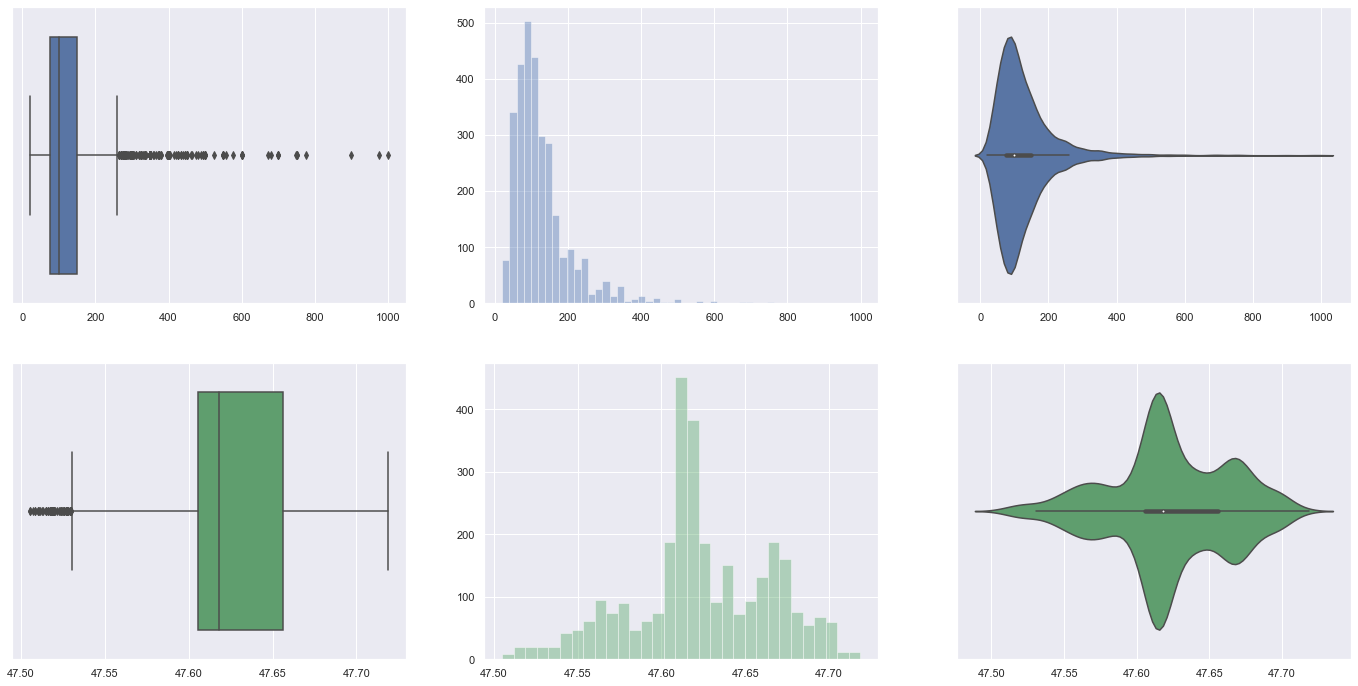

In [19]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Price
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(location_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(location_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(location_train, ax = axes[1,2], color = 'g')

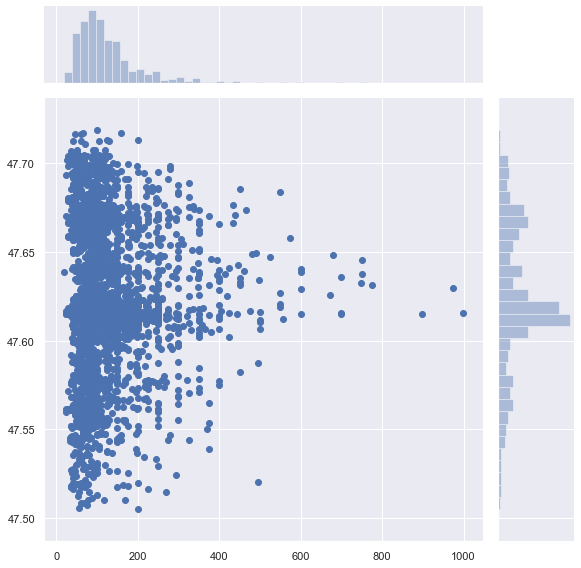

In [20]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, location_train, height = 8)

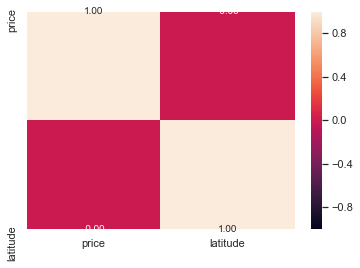

In [22]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, location_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [23]:
location.head()


,latitude
0,47.636289
1,47.639123
2,47.629724
3,47.638473
4,47.632918


In [24]:
data['total_accuracy_review_score'] = data['review_scores_rating'] * data['review_scores_accuracy']

In [25]:
data['total_accuracy_review_score'].head()

0    950.0
1    960.0
2    970.0
3      0.0
4    828.0
Name: total_accuracy_review_score, dtype: float64

In [26]:
data.to_csv(r'File Name.csv', index = False)

In [27]:
# Linear regression checking beween total_accuracy_review and price

In [28]:
price = pd.DataFrame(data['price'])  # Response
accuratereviews = pd.DataFrame(data['total_accuracy_review_score'])        # Predictor 

In [29]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
accuratereviews_train = pd.DataFrame(accuratereviews[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
accuratereviews_test = pd.DataFrame(accuratereviews[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, accuratereviews_train.shape)
print("Test Set  :", price_test.shape, accuratereviews_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


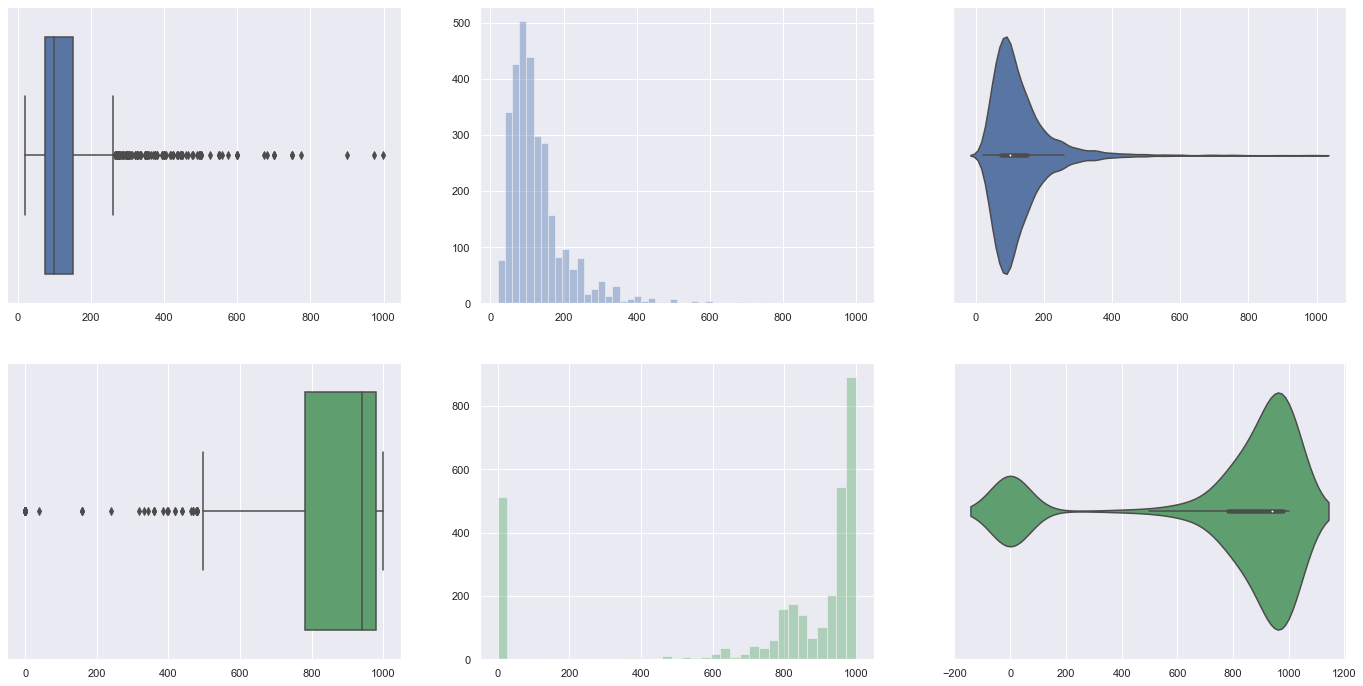

In [30]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(accuratereviews_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(accuratereviews_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(accuratereviews_train, ax = axes[1,2], color = 'g')

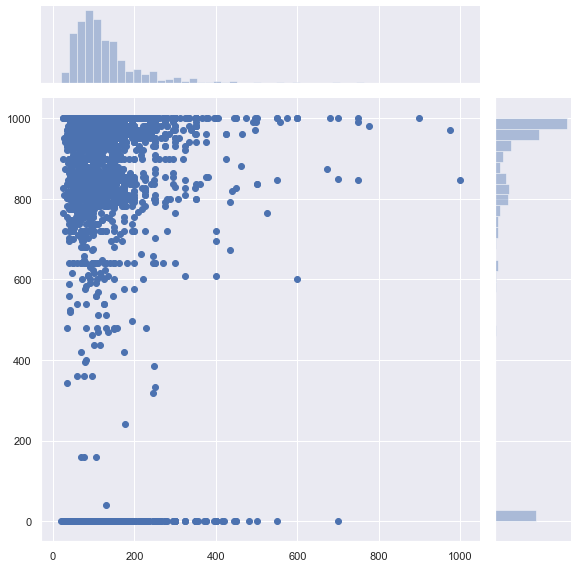

In [31]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, accuratereviews_train, height = 8)

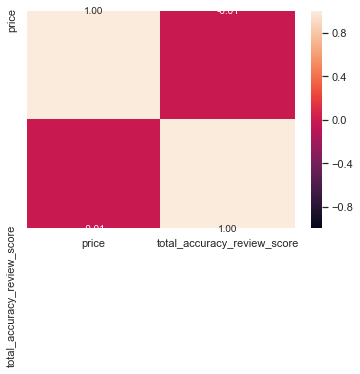

In [32]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, accuratereviews_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [33]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(accuratereviews_train, price_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(accuratereviews_train, price_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
# Linear regression checking beween review and price

In [36]:
price = pd.DataFrame(data['price'])  # Response
reviews = pd.DataFrame(data['number_of_reviews'])        # Predictor 

In [37]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
reviews_train = pd.DataFrame(reviews[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
reviews_test = pd.DataFrame(reviews[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, reviews_train.shape)
print("Test Set  :", price_test.shape, reviews_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


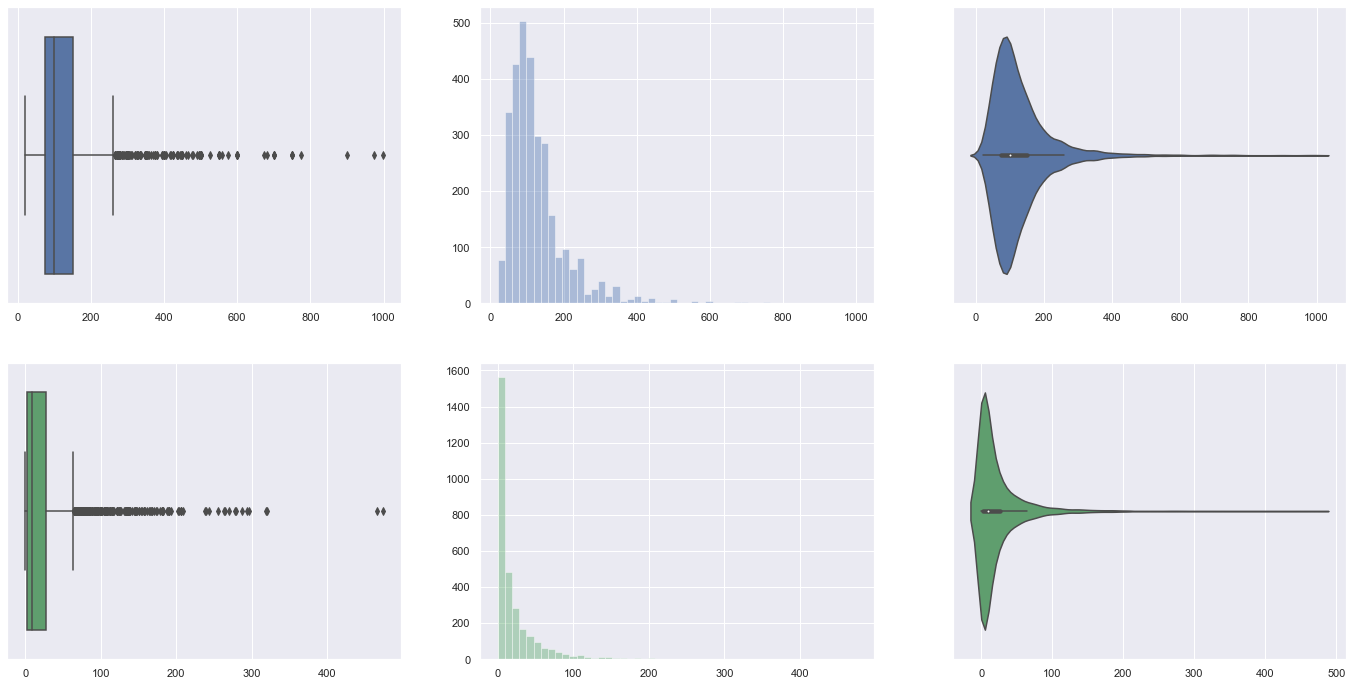

In [38]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Price
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(reviews_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(reviews_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(reviews_train, ax = axes[1,2], color = 'g')

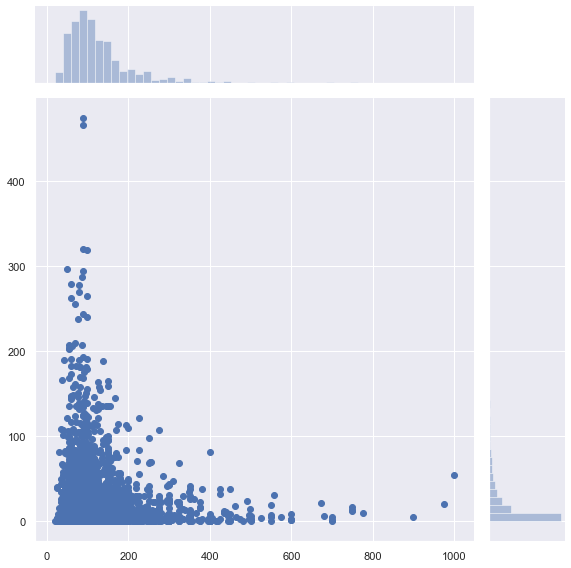

In [39]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, reviews_train, height = 8)

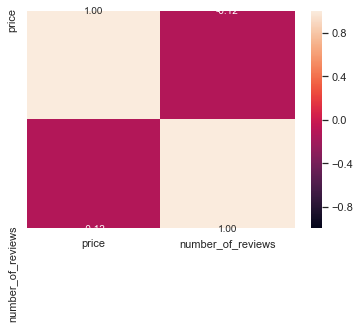

In [40]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, reviews_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [41]:
# Linear regression checking beween host listing and price

In [42]:
price = pd.DataFrame(data['price'])  # Response
listingcount = pd.DataFrame(data['calculated_host_listings_count'])        # Predictor 

In [43]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
listingcount_train = pd.DataFrame(listingcount[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
listingcount_test = pd.DataFrame(listingcount[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, listingcount_train.shape)
print("Test Set  :", price_test.shape, listingcount_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


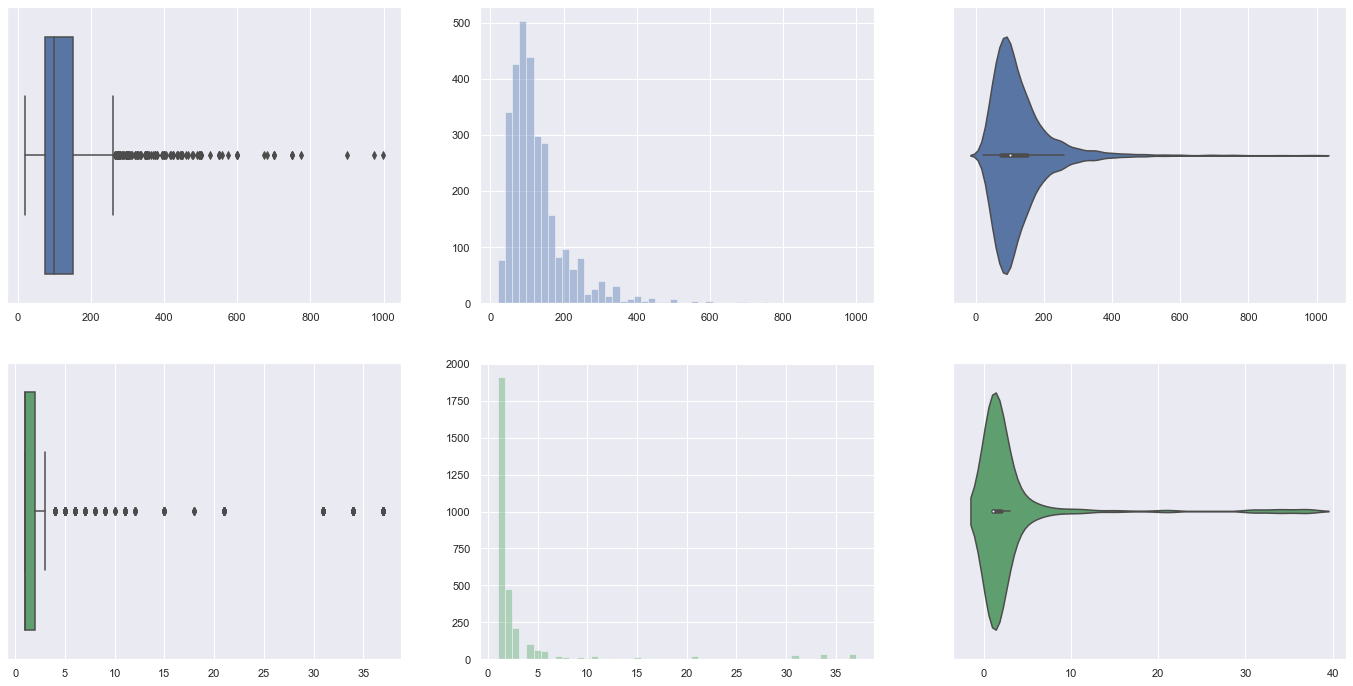

In [44]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Price
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(listingcount_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(listingcount_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(listingcount_train, ax = axes[1,2], color = 'g')

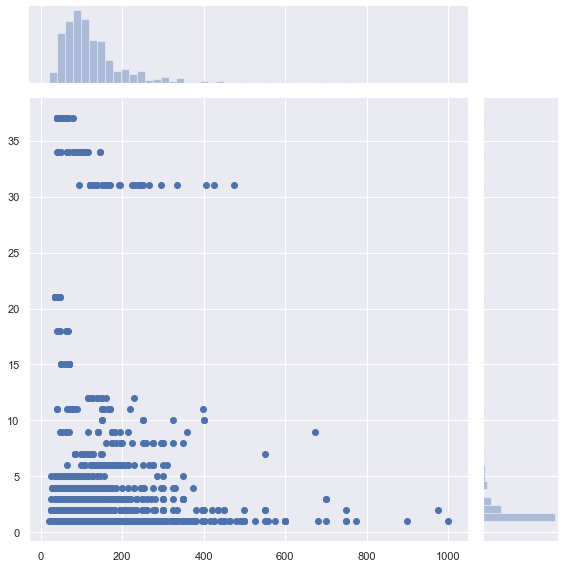

In [45]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, listingcount_train, height = 8)

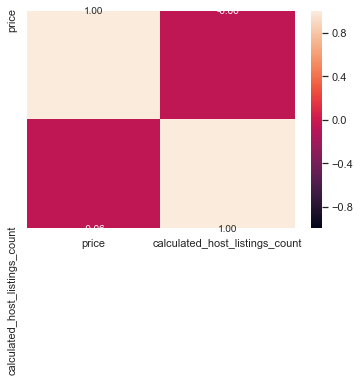

In [47]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, listingcount_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


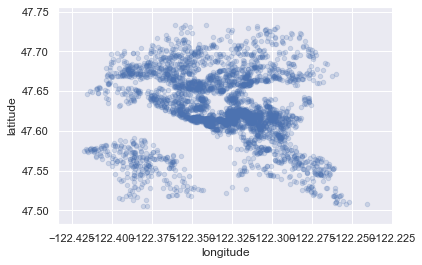

In [49]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

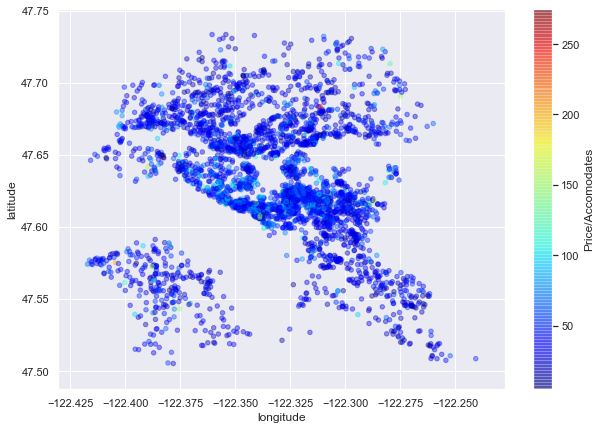

In [50]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="Price/Accomodates", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [51]:
corr_matrix = listings.corr()
corr_matrix["Price/Accomodates"].sort_values(ascending=False)

Price/Accomodates                 1.000000
price                             0.450056
weekly_price                      0.130275
security_deposit                  0.061220
monthly_price                     0.059170
availability_365                  0.030469
host_id                           0.028344
bathrooms                         0.024406
id                                0.018139
cleaning_fee                      0.017096
availability_30                   0.013015
square_feet                       0.002689
availability_60                   0.000509
minimum_nights                    0.000373
availability_90                  -0.002546
host_total_listings_count        -0.003202
host_listings_count              -0.003202
maximum_nights                   -0.003295
extra_people                     -0.015755
latitude                         -0.018131
calculated_host_listings_count   -0.043426
longitude                        -0.045830
bedrooms                         -0.069800
guests_incl

In [702]:
corr_matrix = listings.corr()
corr_matrix["price"].sort_values(ascending=False)

KeyError: 'price'

In [264]:
# Histogram plot of response variable(price)
# Examine distribution of price via histogram as well as the distribution of the log transformed prices
# Take Log transformed price for machine learning modelling because it follows a normal distribution better

In [44]:
def plot_price(df):
    plt.rcParams['figure.figsize']=(20,4)
    plt.style.use(style='ggplot')
    xxx,sub=plt.subplots(1,2)
    
    sub[0].hist(df.price, color='blue')
    sub[0].set_title('price; skewness=%.5f'%(df.price.skew()),fontsize=20)
    sub[0].set_xlabel('Price',fontsize=20)
    sub[0].tick_params(labelsize=16)
    
    sub[1].hist(np.log1p(df.price), color='blue')
    sub[1].set_title('Log transfromed price; skewness=%.5f'%(np.log1p(df.price).skew()),fontsize=20)
    sub[1].set_xlabel('log(Price)',fontsize=20)
    sub[1].tick_params(labelsize=16)
    
    plt.show()

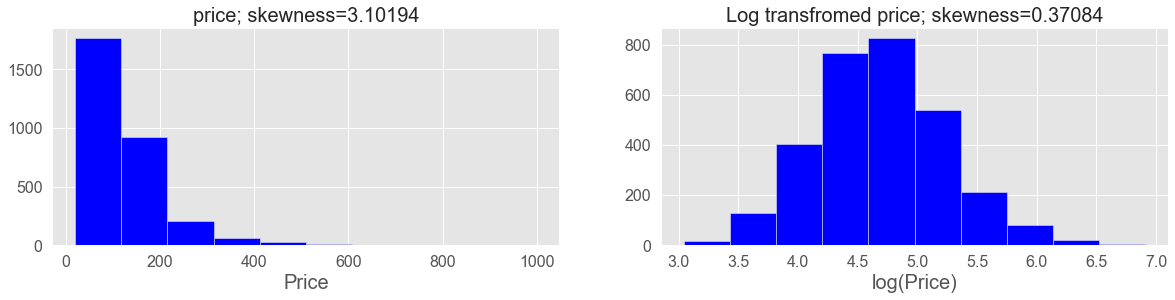

In [45]:
plot_price(train)

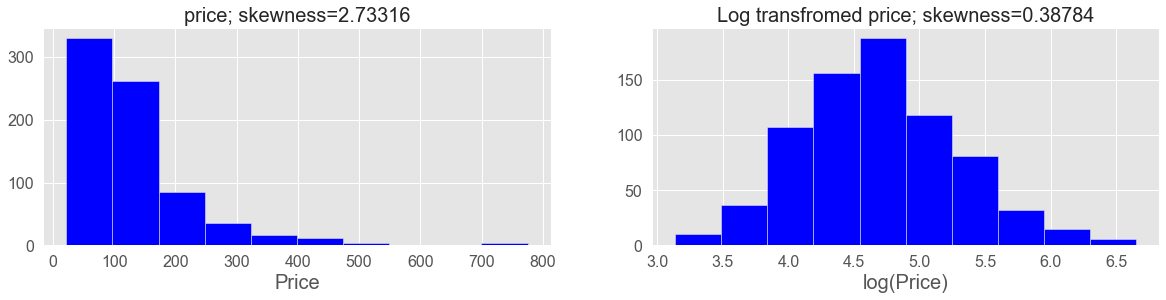

In [46]:
plot_price(test)

In [47]:
train['price'].describe()

count    3007.000000
mean      126.844031
std        87.100660
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       999.000000
Name: price, dtype: float64

In [269]:
# Frequency distribution of property type

In [270]:
def plot_property(df,title):
    all_properties=df['property_type'].tolist()
    fdist = FreqDist(all_properties)
    prop = pd.DataFrame({'Property': list(fdist.keys()),'Count': list(fdist.values())})
    prop = prop.nlargest(columns="Count", n = 10)
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    prop.plot(x='Property',y='Count',kind='bar',color='red')
    plt.ylabel('Frequency',fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=12)
    plt.tick_params(labelsize=20)
    plt.xticks(rotation='vertical')
    plt.legend(fontsize=22)
    plt.show()

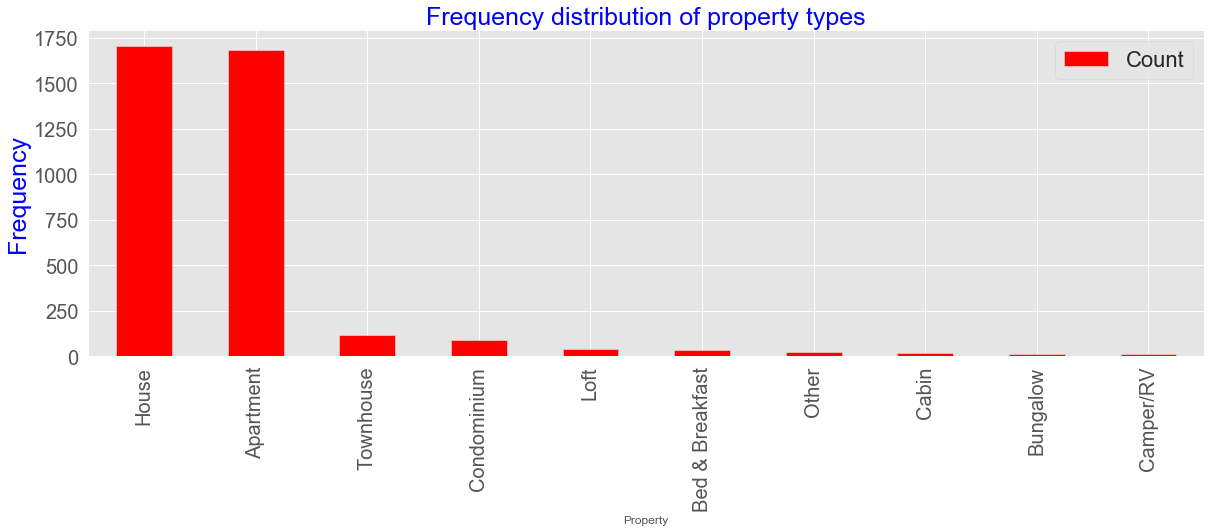

In [272]:
df = listings
title='Frequency distribution of property types'
plot_property(df,title)

In [273]:
#average price of each property type

In [274]:
def plot_average_price(feature,label,df,nlength,title,color1,color2):
    
    sort_price = df.groupby(feature)['price'].mean().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'average price'}, inplace=True)
    
    d = sort_price.copy()
    d = d.nlargest(columns="average price", n =min(len(d),nlength))
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    #plt.bar(d['neighbourhood'],d['average price'])
    d.plot(x=label, y='average price', kind="bar",color=color1)
    #plt.xlabel(label,fontsize=25,color=color2)
    plt.ylabel('Average price',fontsize=25,color=color2)
    plt.title(title,fontsize=25,color=color2)
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=20)
    plt.xticks(rotation='vertical')
    plt.show()

def plot_median_price(feature,label,df,nlength,title,color1,color2):
    
    sort_price = df.groupby(feature)['price'].median().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'median price'}, inplace=True)
    
    d = sort_price.copy()
    d = d.nlargest(columns="median price", n =min(len(d),nlength))
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    #plt.bar(d['neighbourhood'],d['average price'])
    d.plot(x=label, y='median price', kind="bar",color=color1)
    #plt.xlabel(label,fontsize=25)
    plt.ylabel('Median price',fontsize=25,color=color2)
    plt.title(title,fontsize=25,color=color2)
    #plt.xlabel('Amenity',fontsize=12)
    plt.legend(fontsize=20)
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()

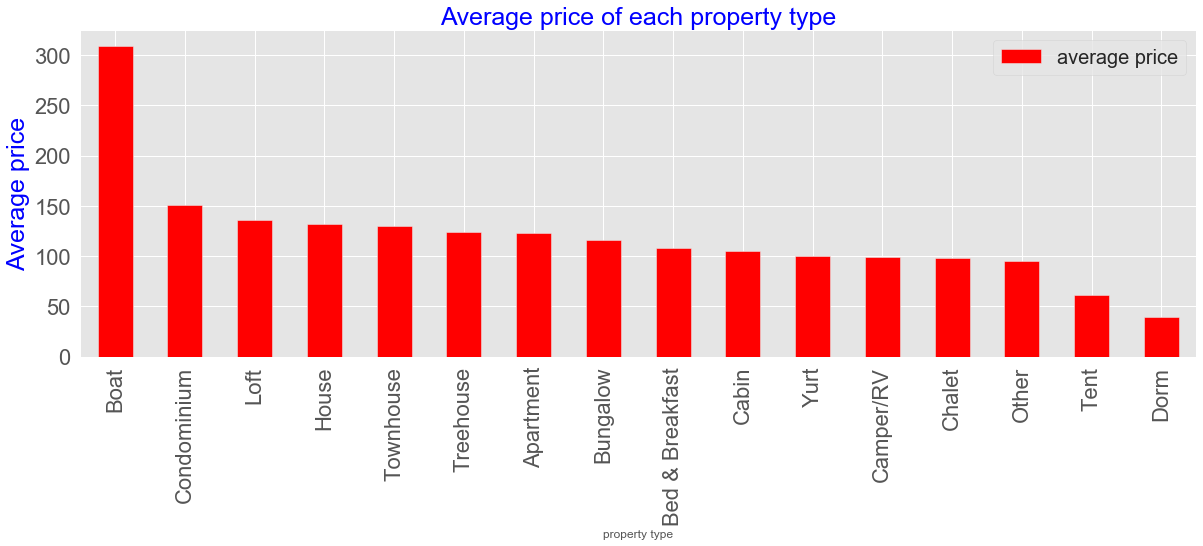

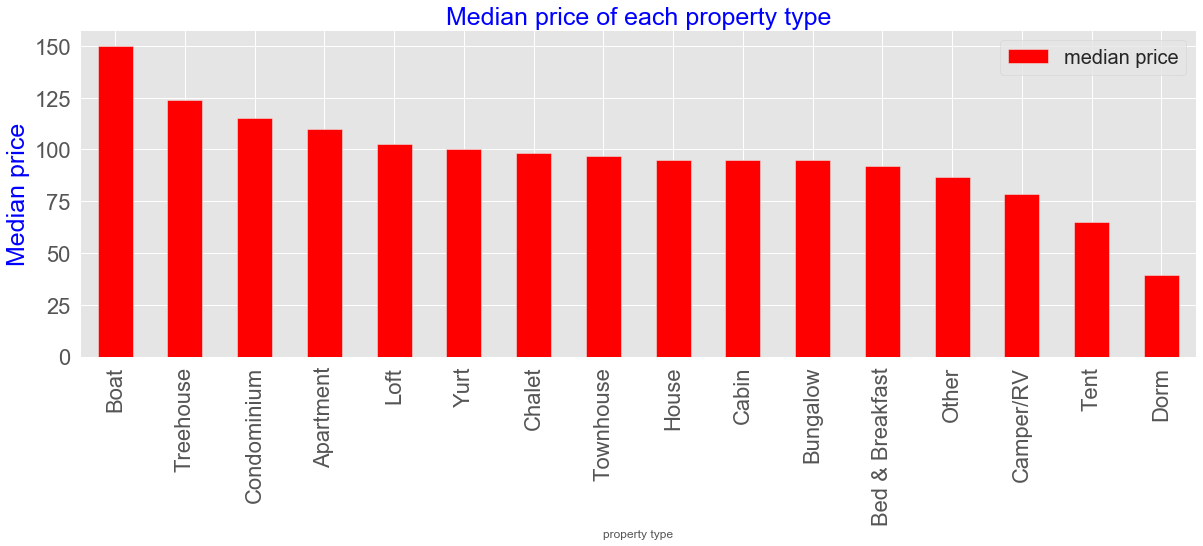

In [275]:
df=listings
title1 = 'Average price of each property type'
title2 = 'Median price of each property type'

plot_average_price('property_type','property type',df,30,title1,'red','blue')
plot_median_price('property_type','property type',df,30,title2,'red','blue')

In [276]:
#distribution of listing across neighbourhood

In [1081]:
def plot_neighboorhood(df,title,nthreshhold):
    print("Number of neighboorhoods in New York:", df.neighbourhood_cleansed.nunique(),'\n')
    listings_per_nbhood = df['neighbourhood_cleansed'].value_counts()

    acceptable_nbhood = listings_per_nbhood[listings_per_nbhood >=nthreshhold].index
    acceptable_listings = df[df['neighbourhood_cleansed'].isin(acceptable_nbhood)]
    listings_per_nbhood = acceptable_listings['neighbourhood_cleansed'].value_counts()
    #print("Number of neighboorhoods in New York with at least {} listings: {}".format(
    #nthreshhold,acceptable_listings['neighbourhood_cleansed'].nunique()))
    #print(acceptable_listings.shape)
    
    listings_per_nbhood.to_frame()
    listings_per_nbhood.columns = ['neighborhood','count']
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    listings_per_nbhood.plot(x="neighborhood", y='count', kind="bar")
    #plt.xlabel('neighborhood',fontsize=25)
    plt.ylabel('Number of listings',fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=12)
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=22)
    plt.show()

Number of neighboorhoods in New York: 87 



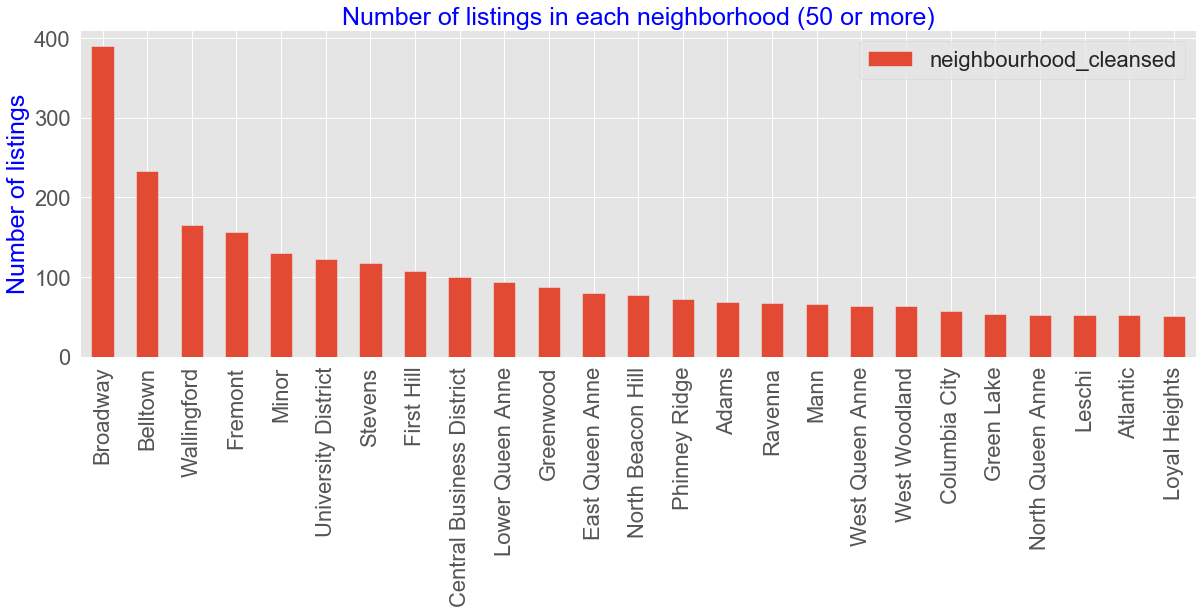

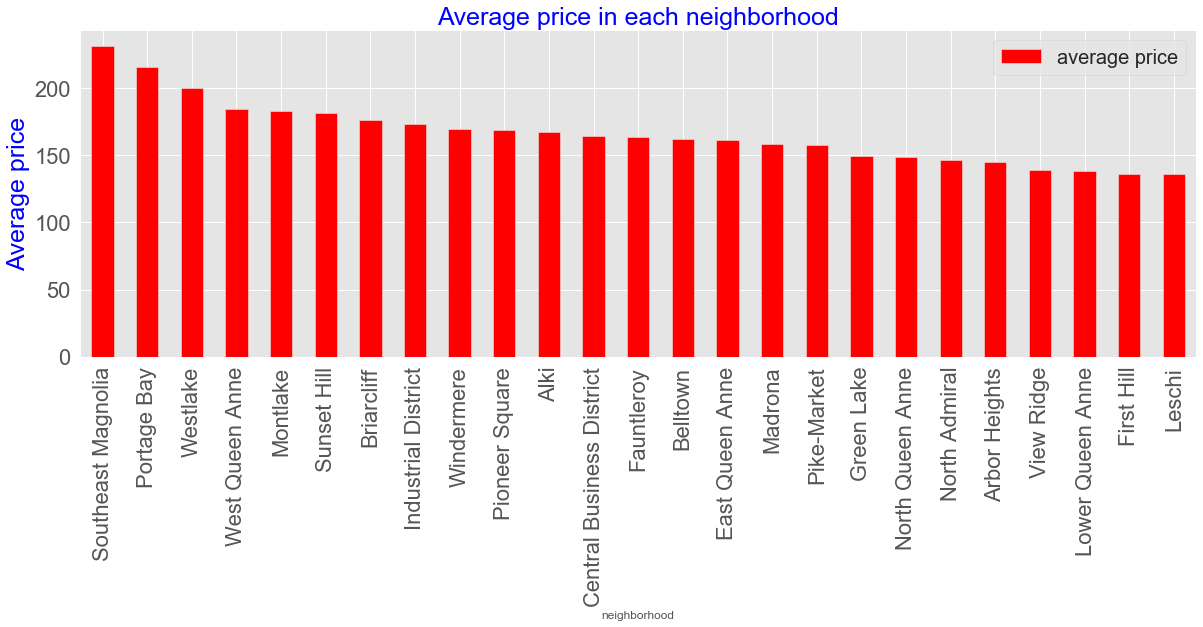

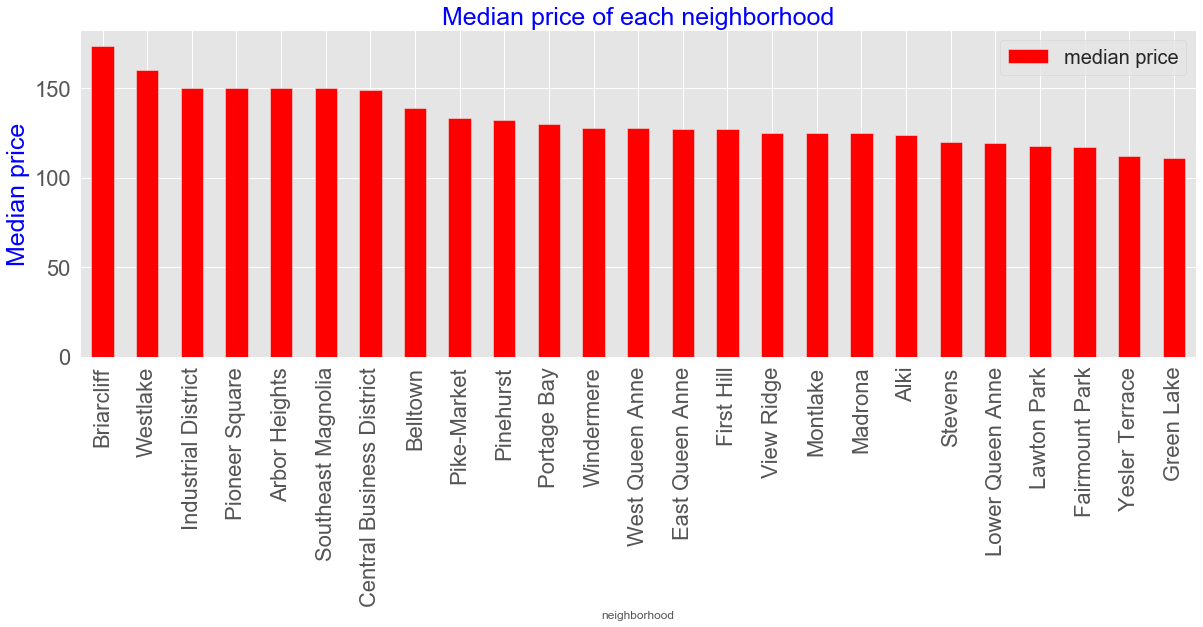

In [1082]:
df = listings
nthreshhold=50
nshow=25

title1 = 'Number of listings in each neighborhood (50 or more)'
title2 = 'Average price in each neighborhood'
title3 = 'Median price of each neighborhood'

plot_neighboorhood(df,title1,nthreshhold)
plot_average_price('neighbourhood_cleansed','neighborhood',df,nshow,title2,'red','blue')
plot_median_price('neighbourhood_cleansed','neighborhood',df,nshow,title3,'red','blue')

In [1083]:
#distribution price with respect to room type

In [1084]:
def plot_price_wrt_room_type(df,title):
    df2 = df.pivot(columns='room_type',values='price')
    x1=list(df2[df2.columns[0]])
    x2=list(df2[df2.columns[1]])
    x3=list(df2[df2.columns[2]])

    plt.rc('legend',**{'fontsize':25})
    #plt.legend(fontsize=20)
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=25)
    plt.ylabel("Count",fontsize=25,color='blue')
    plt.xlabel("Price",fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.legend(prop={'size': 10}) 
    plt.tick_params(labelsize=25)
    n_bins=12
    colors = ['yellow', 'red', 'green']
    labels=[df2.columns[0],df2.columns[1],df2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

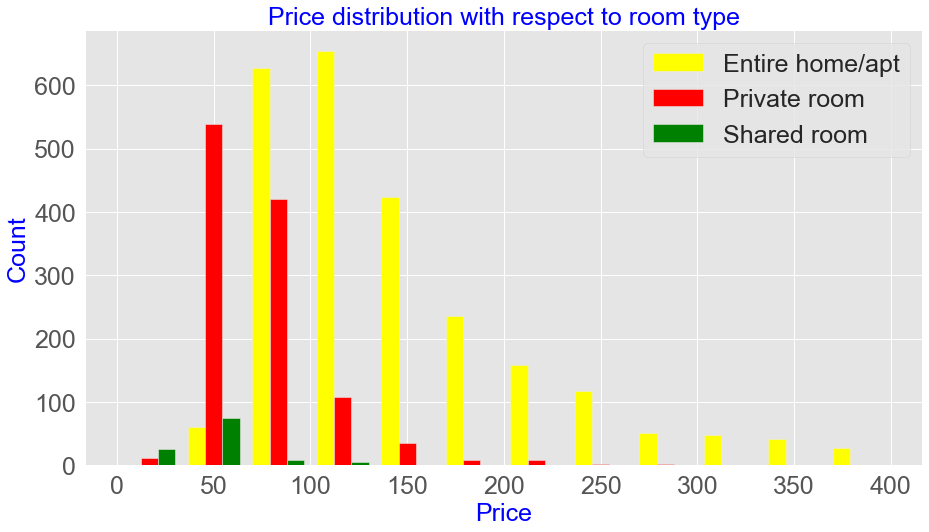

In [1085]:
df=listings
title='Price distribution with respect to room type'
plot_price_wrt_room_type(df,title)

In [1086]:
# distribution of price with respect to number of beds

In [1087]:
def plot_price_wrt_number_of_beds(df,title):
    df2 = df.pivot(columns='beds',values='price')
    x=[list(df2[df2.columns[i]]) for i in range(len(df2.columns)) if i <= 10]
    labels=[str(int(df2.columns[i]))+' beds' for i in range(len(df2.columns))]

    plt.rc('legend',**{'fontsize':20})
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=14)
    plt.ylabel("Count",fontsize=25,color='blue')
    plt.xlabel("Price",fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.legend(prop={'size': 10}) 
    plt.tick_params(labelsize=25)
    n_bins=12
    plt.hist(x, n_bins, stacked=True,range=[0,600],label=labels)        
    plt.legend(loc="upper right")
    plt.show()
    

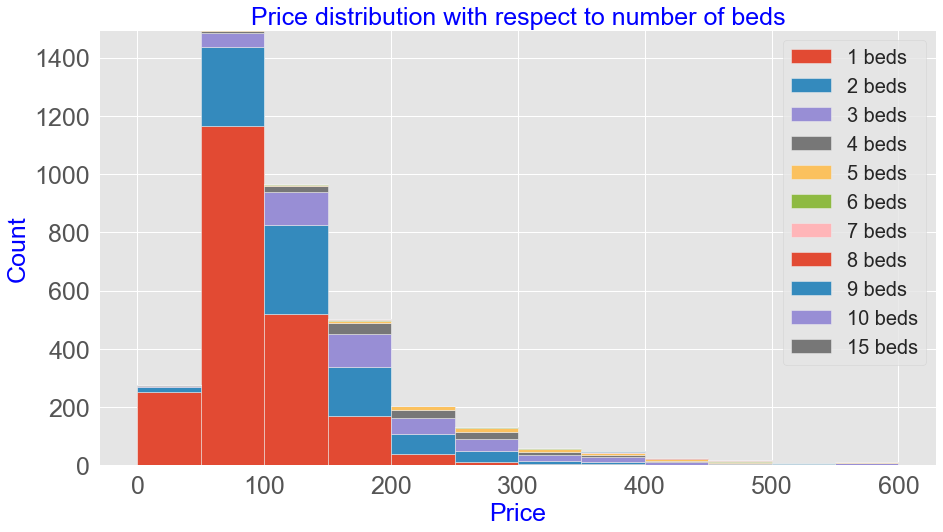

In [1088]:
df=listings
title='Price distribution with respect to number of beds'
plot_price_wrt_number_of_beds(df,title)

In [48]:
#distribution of amenitities

In [49]:
def get_amenities(df,message1,message2):
    all_amenities=df['amenities'].tolist()
    #all_amenities=','.join(all_amenities).split(',')
    all_amenities=','.join(map(str, all_amenities)).split(',')
    #all_amenities=list(all_amenities)
    #x='\'\''
    #if x in all_amenities: print('Yes')
    unique_amenities=set(all_amenities)
    unique_amenities=list(unique_amenities)
    print()
    print(message1.format(len(unique_amenities)),'\n')
    print(message2.format(sorted(unique_amenities)))
    
    return (all_amenities,unique_amenities)

In [50]:
df = listings
message1='Number of unique amenities is {}'
message2='List of amenities={}'
all_amenities_listing,unique_amenities_listing = get_amenities(df,message1,message2)


Number of unique amenities is 40 

List of amenities=['24-Hour Check-in', 'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building', 'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer', 'Wheelchair Accessible', 'Wireless Internet']


In [51]:
df = train
message1='Training set: number of unique amenities is {}'
message2='Training set: list of amenities={}'
all_amenities_train,unique_amenities_train = get_amenities(df,message1,message2)


Training set: number of unique amenities is 39 

Training set: list of amenities=['24-Hour Check-in', 'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building', 'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Washer', 'Wheelchair Accessible', 'Wireless Internet']


In [52]:
df = test
message1='Test set: number of unique amenities is {}'
message2='Test set: list of amenities={}'
all_amenities_test,unique_amenities_test = get_amenities(df,message1,message2)


Test set: number of unique amenities is 40 

Test set: list of amenities=['24-Hour Check-in', 'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building', 'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer', 'Wheelchair Accessible', 'Wireless Internet']


In [53]:
def amenities_frequency_plot(amenities,title,plot):
    
    fdist = FreqDist(amenities)
    d = pd.DataFrame({'Amenity': list(fdist.keys()),'Count': list(fdist.values())})
    #print(d.shape) 
    d2=d.copy()
    d2 = d2.nlargest(columns="Count", n = 25)

    if plot==True:
        plt.style.use('ggplot')
        plt.rcParams['figure.figsize']=(20,6)
        plt.style.use(style='ggplot')
        d2.plot(x='Amenity',y='Count',kind='bar',color='red')
        plt.ylabel('Frequency',fontsize=25,color='blue')
        #plt.xlabel('Amenity',fontsize=25,color='blue')
        plt.title(title,fontsize=25,color='blue')
        #plt.xlabel('Amenity',fontsize=12)
        plt.tick_params(labelsize=20)
        plt.xticks(rotation='vertical')
        plt.show()
    
    return d

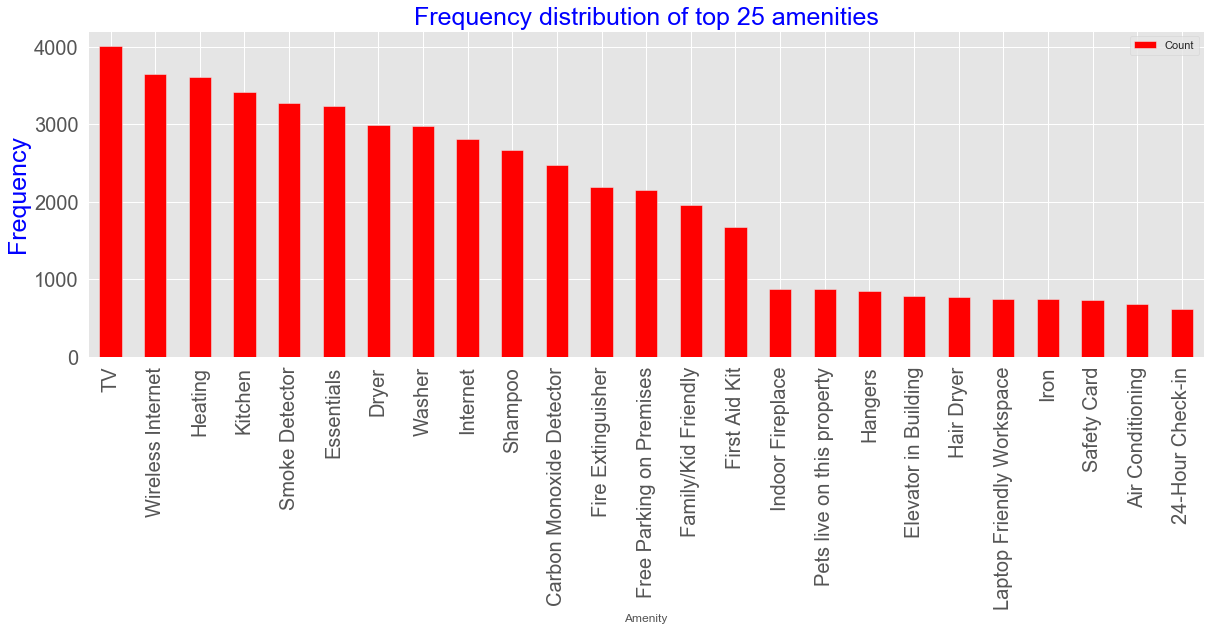

In [54]:
amenities=all_amenities_listing
title='Frequency distribution of top 25 amenities'
amenities_freq_dist_train=amenities_frequency_plot(amenities,title,True)

In [55]:
amenities=all_amenities_train
title='Training set: Frequency distribution of top 25 amenities'
amenities_freq_dist_train=amenities_frequency_plot(amenities,title,False)

In [56]:

amenities=all_amenities_test
title='Test set: Frequency distribution of top 25 amenities'
amenities_freq_dist_test=amenities_frequency_plot(amenities,title,False)

In [57]:
def plot_avg_median_price_amenity(df,unique_amenities,title,measure,ylabel):
    if measure=='mean':
        amenity_prices = [
            (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) 
            for amn in unique_amenities
        ]
    elif measure=='median': 
        amenity_prices = [
            (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].median()) 
            for amn in unique_amenities
        ]
    else:
        return 'measure not found'
        

    amenity_vs_price = pd.Series(data=[a[1] for a in amenity_prices], 
                                 index=[a[0] for a in amenity_prices])
    amenity_vs_price = amenity_vs_price.to_frame().reset_index()
    
    amenity_vs_price = amenity_vs_price.rename(
        columns= {0: ylabel,'index': 'amenity'})

    d2 = amenity_vs_price.nlargest(columns=ylabel, n = 25)
    d2.head()

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    #plt.bar(d['amenity'],d['average price'],color='blue')
    d2.plot(x='amenity',y=ylabel,kind='bar',color='red')
    plt.ylabel(ylabel,fontsize=25,color='blue')
    plt.title(title,fontsize=25,color='blue')
    #plt.xlabel('Amenity',fontsize=12)
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')

    plt.show()

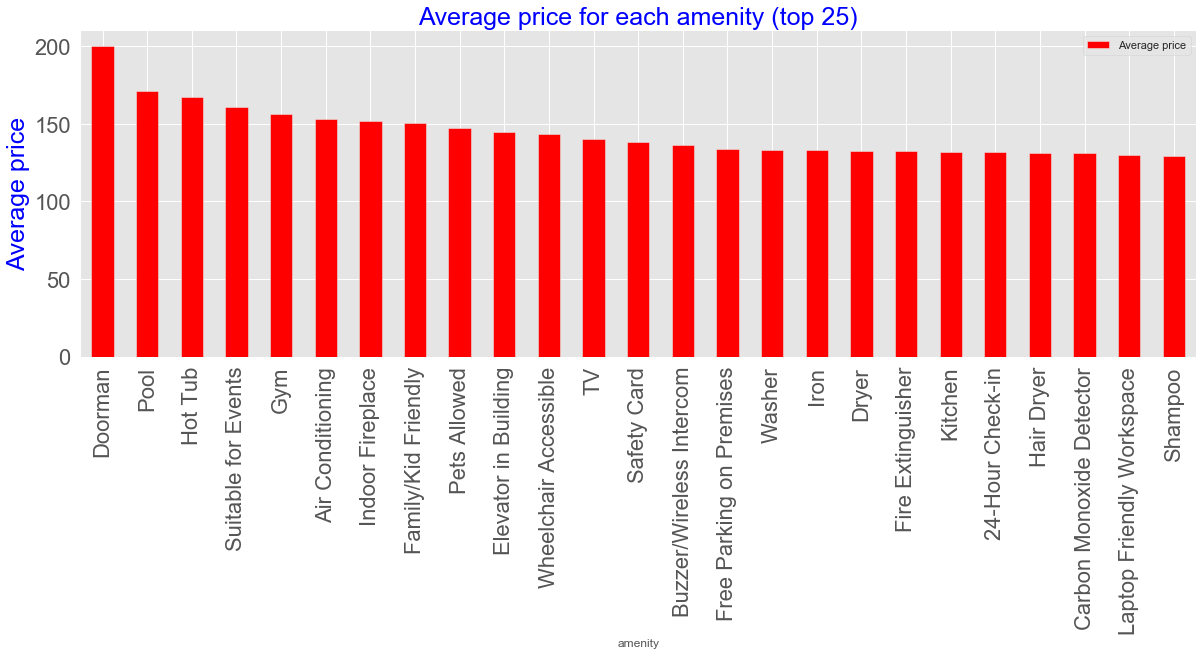

In [58]:
df =listings
unique_amenities = unique_amenities_listing

title='Average price for each amenity (top 25)'
measure='mean'
ylabel='Average price'
plot_avg_median_price_amenity(df,unique_amenities,title,measure,ylabel)

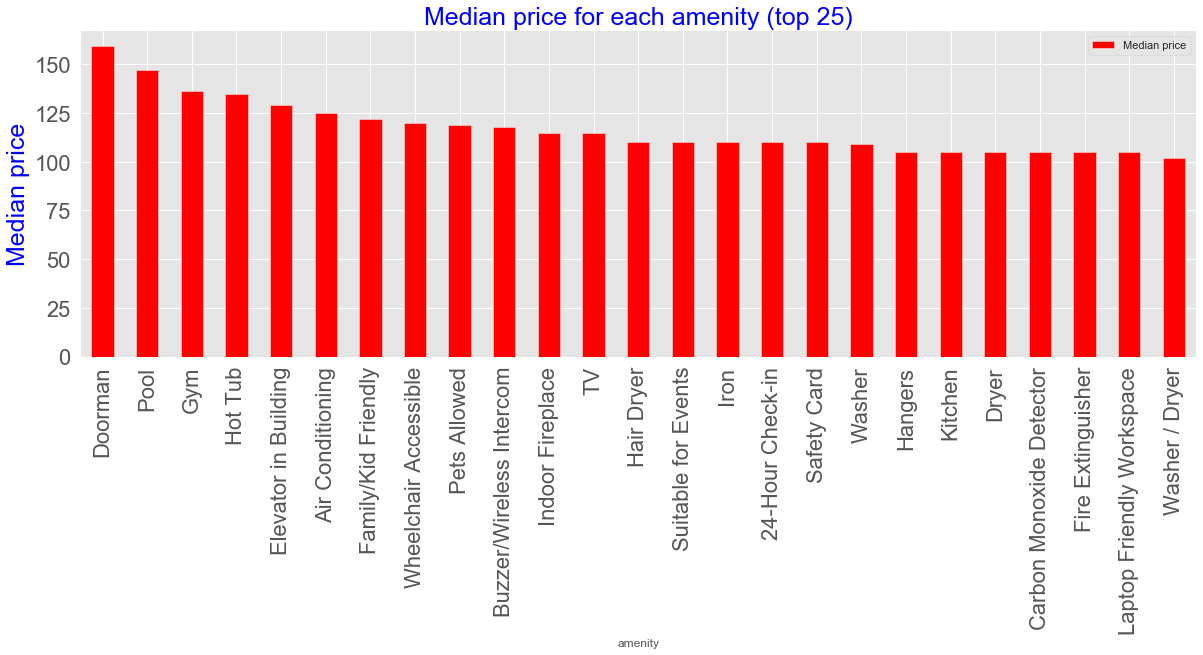

In [59]:
df =listings
unique_amenities = unique_amenities_listing

title='Median price for each amenity (top 25)'
measure='median'
ylabel='Median price'
plot_avg_median_price_amenity(df,unique_amenities,title,measure,ylabel)

In [60]:
# Feature engineering
# Assign each amenity a weight based on its frequency across all the listings considered

In [61]:
def apply_weights_to_listings(x,w):
    x = list(x.split(','))
    s=sum([w['Count'][w['Amenity'][w['Amenity']==i].index.tolist()[0]] for i in x])
    return s

def engineer_amenities(df,amenities_freq_dist):
    w = amenities_freq_dist.copy()
    w['Count'] = w['Count']/w['Count'].max()
    df['amenities']=df['amenities'].apply(apply_weights_to_listings,args=[w])
    return df

In [62]:
train_backup = train.copy()
train = engineer_amenities(train,amenities_freq_dist_train)

In [63]:
train.shape
train['amenities'].head()


0     7.931391
1    11.229950
2    12.454887
3     5.828321
4     8.512845
Name: amenities, dtype: float64

In [64]:
test_backup = test.copy()
test = engineer_amenities(test,amenities_freq_dist_test)
test.shape
test['amenities'].head()

0    12.078721
1     9.649446
2    12.339483
3     7.040590
4    10.425584
Name: amenities, dtype: float64

In [65]:
# Encode categorical variables

In [66]:
def encode(df):
    categorical_features = list(df.columns[df.dtypes == 'object'])
    for i in  categorical_features:
        df[i] = LabelEncoder().fit_transform(df[i])
    return df


In [67]:
train.dtypes

host_id                               int64
host_is_superhost                    object
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
state                                object
zipcode                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                           float64
price                           

In [68]:
train.head()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,7354306,f,18.0,18.0,"['email', 'phone', 'reviews']",t,f,Stevens,Capitol Hill,WA,...,45,72,347,4/1/2016,20,f,strict,f,f,18
1,3737272,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Maple Leaf,Northgate,WA,...,27,48,323,4/1/2016,43,f,strict,f,t,1
2,20321164,t,3.0,3.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,Greenwood,Other neighborhoods,WA,...,0,0,242,4/1/2016,16,f,flexible,f,f,3
3,25417834,t,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,WA,...,52,82,171,4/1/2016,45,t,moderate,f,f,1
4,19962298,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,First Hill,Downtown,WA,...,46,66,287,4/1/2016,71,t,moderate,f,f,1


In [69]:
train = encode(train)
train.head()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,7354306,0,18.0,18.0,83,1,0,74,2,0,...,45,72,347,0,20,0,2,0,0,18
1,3737272,0,1.0,1.0,34,1,1,43,10,0,...,27,48,323,0,43,0,2,0,1,1
2,20321164,1,3.0,3.0,11,1,1,26,11,0,...,0,0,242,0,16,0,0,0,0,3
3,25417834,1,1.0,1.0,76,1,1,81,12,0,...,52,82,171,0,45,1,1,0,0,1
4,19962298,0,1.0,1.0,76,1,1,20,6,0,...,46,66,287,0,71,1,1,0,0,1


In [70]:
# creating instance of one-hot-encoder
Oh_enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
Oh_enc_df = pd.DataFrame(Oh_enc.fit_transform(train[['host_verifications','neighbourhood_cleansed', 
                                                     'neighbourhood_group_cleansed', 'state','zipcode']]).toarray())

# merge with main df bridge_df on key values
train = train.join(Oh_enc_df)
train

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,226,227,228,229,230,231,232,233,234,235
0,7354306,0,18.0,18.0,83,1,0,74,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3737272,0,1.0,1.0,34,1,1,43,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20321164,1,3.0,3.0,11,1,1,26,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25417834,1,1.0,1.0,76,1,1,81,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19962298,0,1.0,1.0,76,1,1,20,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,18232665,0,1.0,1.0,53,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,33940698,0,1.0,1.0,1,1,0,3,4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3004,1717300,0,2.0,2.0,33,1,1,9,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3005,40548312,1,1.0,1.0,65,1,1,1,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
test.dtypes

host_id                               int64
host_is_superhost                    object
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
state                                object
zipcode                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                           float64
price                           

In [72]:
test = encode(test)
test.head()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,22372266,0,1.0,1.0,27,1,1,75,12,0,...,40,65,327,0,18,1,2,0,0,1
1,2983711,0,1.0,1.0,65,1,0,75,12,0,...,60,69,69,0,1,0,2,0,0,1
2,6170760,0,1.0,1.0,26,1,1,75,12,0,...,0,0,125,0,0,0,0,0,0,1
3,14100483,0,1.0,1.0,58,1,1,75,12,0,...,55,85,360,0,1,0,0,0,0,1
4,16708587,0,2.0,2.0,38,1,1,75,12,0,...,3,33,293,0,8,0,2,0,0,2


In [73]:
# creating instance of one-hot-encoder
Oh_enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
Oh_enc_df = pd.DataFrame(Oh_enc.fit_transform(test[['host_verifications','neighbourhood_cleansed', 
                                                     'neighbourhood_group_cleansed', 'state','zipcode']]).toarray())

# merge with main df bridge_df on key values
test = test.join(Oh_enc_df)
test

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,...,187,188,189,190,191,192,193,194,195,196
0,22372266,0,1.0,1.0,27,1,1,75,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2983711,0,1.0,1.0,65,1,0,75,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6170760,0,1.0,1.0,26,1,1,75,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14100483,0,1.0,1.0,58,1,1,75,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16708587,0,2.0,2.0,38,1,1,75,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,398005,0,1.0,1.0,39,1,1,19,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,26392625,0,1.0,1.0,48,1,1,19,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,16727906,1,1.0,1.0,27,1,1,19,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,1123549,0,2.0,2.0,58,1,1,19,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
test.dtypes

host_id                        int64
host_is_superhost              int32
host_listings_count          float64
host_total_listings_count    float64
host_verifications             int32
                              ...   
192                          float64
193                          float64
194                          float64
195                          float64
196                          float64
Length: 238, dtype: object

In [75]:
# Examine correlation between features in training data set

In [76]:
corrmat = listings.corr()
print (corrmat['price'].sort_values(ascending=False)[:15], '\n')
print (corrmat['price'].sort_values(ascending=False)[-10:])

price                        1.000000
accommodates                 0.658237
bedrooms                     0.633625
beds                         0.595246
cleaning_fee                 0.592969
bathrooms                    0.526198
guests_included              0.399988
security_deposit             0.340482
extra_people                 0.132007
host_listings_count          0.095741
host_total_listings_count    0.095741
minimum_nights               0.018087
maximum_nights              -0.004103
latitude                    -0.011437
availability_365            -0.016584
Name: price, dtype: float64 

maximum_nights                   -0.004103
latitude                         -0.011437
availability_365                 -0.016584
availability_30                  -0.041605
host_id                          -0.045403
availability_60                  -0.053941
calculated_host_listings_count   -0.054175
availability_90                  -0.063652
longitude                        -0.104497
number_of_rev

In [77]:
#correlation between the features in training data

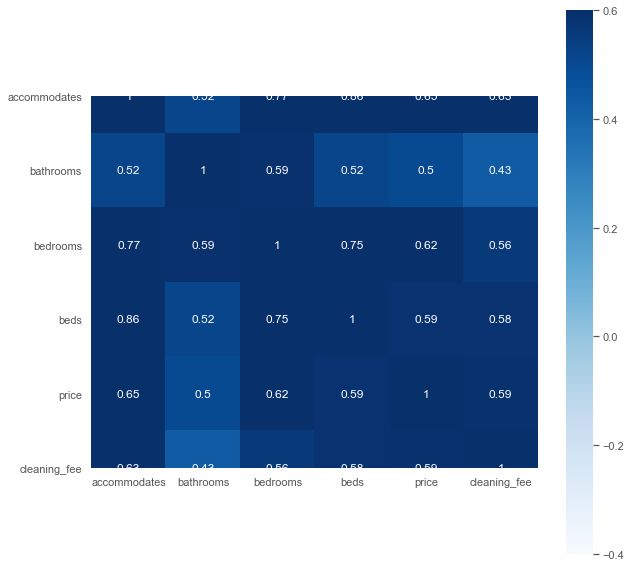

In [78]:
top_corr_features = corrmat.index[abs(corrmat["price"])>0.4]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(), annot = True, cmap = "Blues", 
                cbar = True, vmin = -0.4, vmax = 0.6, square=True, annot_kws={"size": 12})
#sns.heatmap(corrmat,annot= True)

In [79]:
#machine learning (split data into training and test)

In [80]:
#Back up copy
X_train=train.copy()
X_test=test.copy()

y_train = np.log1p(X_train['price'])
y_test  = np.log1p(X_test['price'])

#drop_features=['price',jurisdiction_names','license','square_feet','has_availability']
drop_features=['price']
X_train.drop(drop_features,axis=1,inplace = True)
X_test.drop(drop_features,axis=1,inplace = True)

In [81]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3007, 276), (3007,), (750, 237), (750,))

In [82]:
def evaluate(model, X, y, title):
    predictions = model.predict(X)
    errors = abs(np.expm1(predictions) - np.expm1(y))
    mape = 100 * np.mean(errors / np.expm1(y))
    accuracy = 100 - mape
    score_gbr = model.score(X,y)
    #rsquared = r2_score(y,predictions)
    rmse_gbr = np.sqrt(mean_squared_error(np.expm1(y),np.expm1(predictions)))
    
    print(title)
    print('R^2: {:0.4f}'.format(score_gbr))
    #print('R^2: {:0.4f}'.format(rsquared))
    print('RMSE: ${:0.4f} '.format(rmse_gbr))
    print('Average Error: ${:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.3f}%.'.format(accuracy),'\n')
    
    return predictions

    
def scatter_plot(prediction,y,title):
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    plt.scatter(x=prediction, y=y, alpha=.75)
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title(title,fontsize=16)
    plt.show()    
    
def feature_extraction(importances,title):
    plt.rcParams['figure.figsize']=(12,6)
    importances[0:15].iloc[::-1].plot(kind='barh',legend=False,fontsize=16)
    #importances.plot(kind='barh',legend=False,fontsize=16)
    plt.tick_params(labelsize=18)
    plt.ylabel("Feature",fontsize=20)
    plt.xlabel("Importance viariable",fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()
    
def scatter_plot2(prediction1,y1,prediction2,y2,title):
    a=min(min(prediction1),min(y1),min(prediction2),min(y2))-0.2
    b=max(max(prediction1),max(y1),max(prediction2),max(y2))+0.2
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    plt.scatter(x=prediction1, y=prediction1-y1, color='red',label='Training data',alpha=.75)
    plt.scatter(x=prediction2, y=prediction2-y2, color='blue', marker='s', label='Test data',alpha=.75)
    plt.hlines(y = 0, xmin = a, xmax = b, color = "black")
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title(title,fontsize=16)
    plt.legend(fontsize=16)
    plt.show()    


def scatter_plot3(prediction1,y1,prediction2,y2,title):
    a=min(min(prediction1),min(y1),min(prediction2),min(y2))-0.2
    b=max(max(prediction1),max(y1),max(prediction2),max(y2))+0.2
    plt.rcParams['figure.figsize']=(10,4)
    plt.style.use(style='ggplot')
    plt.scatter(x=prediction1, y=y1, color='red',label='Training data',alpha=.75)
    plt.scatter(x=prediction2, y=y2, color='blue', marker='s', label='Test data',alpha=.75)
    plt.plot([a, b], [a, b], c = "black")
    plt.ylabel('log(input price)',fontsize=16)
    plt.xlabel('log(predicted price)',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.title(title,fontsize=16)
    plt.legend(fontsize=16)
    plt.show()    

In [83]:
gbr = GradientBoostingRegressor(min_samples_split=400,
                                min_samples_leaf=50,
                                subsample=0.8,
                                random_state=1,
                               learning_rate=0.01,
                               max_features='sqrt')
#param_grid = {"n_estimators":np.arange(1000,10000,1000),'learning_rate':[0.01,0.05,0.1,0.25,0.5]}
param_grid = dict(n_estimators=[6000,7000], max_depth=[8,12,16])

grid_gbr=GridSearchCV(gbr, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=-2)

grid_gbr.fit(X_train,y_train)

#print("Random forest grid.cv_results_ {}".format(grid_gbr.cv_results_))
print("Random forest grid.best_score_ {}".format(grid_gbr.best_score_))
print("Random forest grid.best_params_ {}".format(grid_gbr.best_params_))
print("Random forest grid.best_estimator_ {}".format(grid_gbr.best_estimator_))

model_gbr = grid_gbr.best_estimator_


Random forest grid.best_score_ -0.0801959484725863
Random forest grid.best_params_ {'max_depth': 8, 'n_estimators': 7000}
Random forest grid.best_estimator_ GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=400,
                          min_weight_fraction_leaf=0.0, n_estimators=7000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=0.8, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


In [84]:
#line 133

In [85]:
data['estimated_revenue'] = data['price'] * data['minimum_nights']


                              estimated_revenue
neighbourhood_group_cleansed                   
Capitol Hill                         555.495591
Downtown                             376.690566
Magnolia                             359.016393
Queen Anne                           352.600000
Cascade                              343.584270
West Seattle                         302.605911
Other neighborhoods                  287.552897
Ballard                              281.239130
Central Area                         278.409214
Seward Park                          216.272727
Interbay                             204.545455
Beacon Hill                          201.398305
Rainier Valley                       186.779874
Lake City                            185.791045
University District                  179.696721
Delridge                             174.227848
Northgate                            164.975000


C:\Users\glenn\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\glenn\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


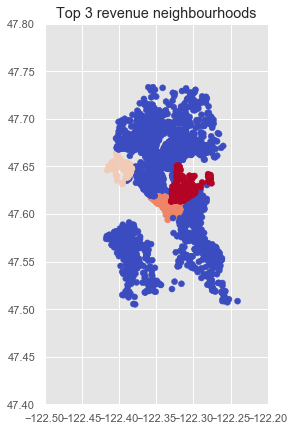

In [86]:
pd_neighbourhood_revenue = data[['neighbourhood_group_cleansed','estimated_revenue']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

pd_listings_plot = data[['neighbourhood_group_cleansed','longitude','latitude','estimated_revenue']]
pd_listings_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in pd_neighbourhood_revenue[0:3].index:
  pd_listings_plot.at[pd_listings_plot['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2

# plot
plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")

ax.set_autoscaley_on(False)
ax.set_ylim([47.4, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.5, -122.2])
plt.scatter(pd_listings_plot['longitude'],
            pd_listings_plot['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot['color']
           )

_ = plt.plot()

In [84]:
title0='Gradient Boosting Regression:'
model_tmp = model_gbr

title=title0 + ' training set model performance'
prediction_train=evaluate(model_tmp, X_train, y_train,title)

title=title0 + ' test set model performance'
prediction_test=evaluate(model_tmp, X_test, y_test,title)

title=title0 + ' residual plot'
scatter_plot2(prediction_train,y_train,prediction_test,y_test,title)

title=title0 + ' performance evaluation'
scatter_plot3(prediction_train,y_train,prediction_test,y_test,title)

importances_train = pd.DataFrame({'Feature':X_train.columns, 'Importance':model_tmp.feature_importances_})
importances_train = importances_train.sort_values('Importance',ascending=False).set_index('Feature')
feature_extraction(importances_train,'Gradient Boosting Regression: Training set feature importance')

Gradient Boosting Regression: training set model performance
R^2: 0.8816
RMSE: $36.7482 
Average Error: $19.3806
Accuracy = 85.559%. 



ValueError: Number of features of the model must match the input. Model n_features is 276 and input n_features is 237 